In [1]:
# A practical problem concerning Logistic Regression which is called a Donut Problem

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
N = 1000
D = 2

In [11]:
R_inner = 5 # inner radius
R_outer = 10 # outer radius

# Set a uniformly distributed variable for half the data that depends on the inner radius, i.e. spread around 5
R1 = np.random.random(N/2) + R_inner

# We will generate some angles (they are polar coordinates) that are uniformly distributed
theta = 2*np.pi*np.random.random(N/2)

# We will convert the polar coordinates into x, y coordinates.
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

# Let's do the same thing for the outer radius-
R2 = np.random.random(N/2) + R_outer
theta = 2*np.pi*np.random.random(N/2)
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

# Calculate the entire X
X = np.concatenate([X_inner, X_outer])

# Target, T, 1st set is 0 and 2nd set is 1
T = np.array([0]*int(N/2) + [1]*int(N/2))

C:\Users\Suvro\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Suvro\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Suvro\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Suvro\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [16]:
X_inner[0:10]

array([[-4.39218481, -3.28719593],
       [-5.2834165 ,  1.38633604],
       [ 0.06996687,  5.27652298],
       [-4.81763651,  1.98969642],
       [-3.44026624,  4.14408661],
       [ 3.5713327 , -4.68459098],
       [-0.69368134, -5.59588545],
       [-4.37800751, -4.01184984],
       [-3.70427055, -4.25745094],
       [ 5.38897627,  1.29445497]])

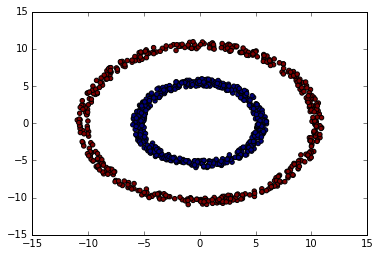

In [12]:
plt.scatter(X[:, 0], X[:, 1], c= T)
plt.show()

In [13]:
# Now the point I was trying to make over here, is that Logistic regression will not be able to draw a line and 
# classify these two classes. But the claim is it is indeed possible.

### Solving the problem

In [17]:
ones = np.array([[1]*N]).T  # bias term

# Trick with the Donut problem, is to create another column which reporesents the radius of the point.
# This will make the classes separable. Let's see how.
r = np.zeros((N, 1))
for i in range(N):
    r[i] = np.sqrt(X[i, :].dot(X[i, :]))
    
Xb = np.concatenate([ones, r, X], axis = 1)

In [19]:
Xb[0:10]

array([[ 1.        ,  5.48606822, -4.39218481, -3.28719593],
       [ 1.        ,  5.46227219, -5.2834165 ,  1.38633604],
       [ 1.        ,  5.27698684,  0.06996687,  5.27652298],
       [ 1.        ,  5.21234241, -4.81763651,  1.98969642],
       [ 1.        ,  5.38598975, -3.44026624,  4.14408661],
       [ 1.        ,  5.89065445,  3.5713327 , -4.68459098],
       [ 1.        ,  5.63871686, -0.69368134, -5.59588545],
       [ 1.        ,  5.93817218, -4.37800751, -4.01184984],
       [ 1.        ,  5.64335971, -3.70427055, -4.25745094],
       [ 1.        ,  5.54226298,  5.38897627,  1.29445497]])

In [22]:
# Let's randomly assign the weight-
w = np.random.rand(D + 2)

z = Xb.dot(w)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Y = sigmoid(z)

# Calculate the cross entropy error-
def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [25]:
learning_rate = 0.0001
error = []
for i in range(5000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 1000 == 0:
        print(e)
        
    # Use gradient descent-
    w += learning_rate * (Xb.T.dot(T - Y) - 0.1*w)  # l-2 reg
    
    Y = sigmoid(Xb.dot(w))

14.1188987278
13.1084636011
12.2747148428
11.5763246927
10.983879371


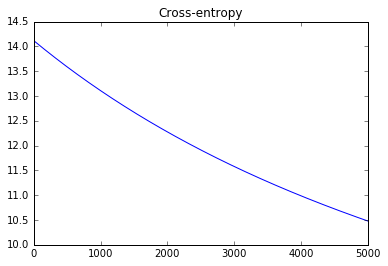

In [26]:
# Plot the error as it evolves with time-
plt.plot(error)
plt.title("Cross-entropy")

In [27]:
print("Final w: ", w)
print("Final Classification Rate: ", np.mean(T == np.round(Y)))

Final w:  [ -1.48225735e+01   1.89207035e+00   7.81748431e-03  -3.79250153e-03]
Final Classification Rate:  1.0


In [ ]:
# So, we get 100 % classification rate.
# You can see here that X1 and X2 weights are almost 0.
# So, the classification does not take those two features into consideration.

# But we have found out that it depends on the Bias and the Radius term

# Say if we put in small radius, we automatically have this negative bias, and that pushes the classification towards 0.
# And if the radius is bigger it pushes the classification towards 1

# And that's how you can solve the Donut problem, using Logistic Regression.